## Assignment - 2
<b>Name: Vijay Rohin Periaiah</b><br>
<b>Topic: Neural Networks</b><br>
<b>Email id: vper0006@student.monash.edu</b>

In [1]:
# Importing packages to predict housing price for the given boston dataset
from sklearn import preprocessing # To import preprocessing package for minmaxscale
from sklearn.model_selection import train_test_split # To import train_test_split package for train and test dataset split up
from neupy import environment # To import environment package for new enivronment creation
from neupy.layers import * # To import all the classes from the neupy layers package
from neupy import algorithms # To import algorithms from the neupy packages
from neupy import plots # To import plots from neupy package
%matplotlib inline

# To import regular packages for plots and tests
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare
from scipy.stats import ttest_ind

In [2]:
# To import boston dataset as a given csv file
data = pd.read_csv('boston_house_prices.csv', sep=",")

In [3]:
# To check the first 5 records of the given dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# To identify the data types of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
# To view the correlation between columns of the boston dataset
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


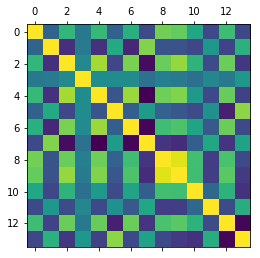

In [6]:
# To show the correlation plot of the given dataset
plt.matshow(data.corr())

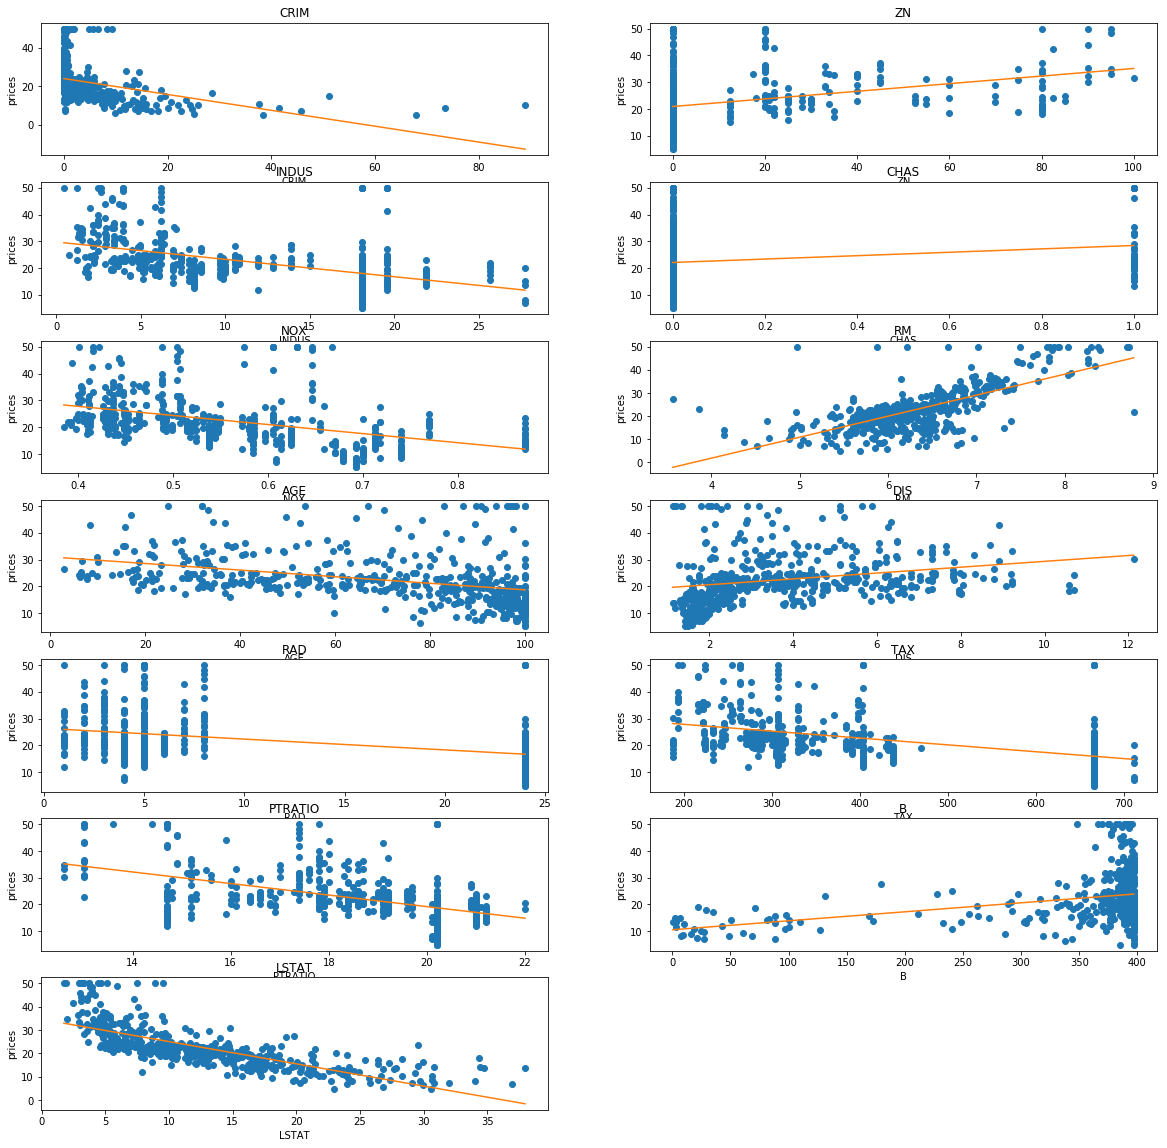

In [7]:
# To seperate the price from the given dataset and extract the features to predict them
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

plt.figure(figsize=(20, 20))

# To view the regression curve of each columns along with price to be predicted
for i, col in enumerate(features.columns):
    plt.subplot(7, 2, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

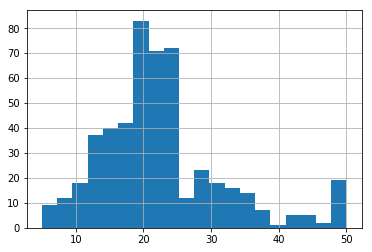

In [8]:
prices.hist(bins=20)
# From this histogram we can infer the distribution of the prices across different given prices

In [9]:
# To view columns names of the features to be used as inputs
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
# To perform transformation of each column using min-max scaler

data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

target = (prices).values

data = features

data = data_scaler.fit_transform(data)

target = target_scaler.fit_transform(target.reshape(-1, 1))

/home/genius/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
environment.reproducible()

# To split dataset into train and test in the ratio of 85% (train) and 15% (test)
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15
)

In [16]:
# To form of the neural network with 13 input layers and one output layer (predicted - price)
# Inner sigmoid layer is maintained as 50
n_inputs = 13
n_outputs = 1

network = join(
    Input(n_inputs),
    Sigmoid(50),
    Sigmoid(n_outputs),
)

In [17]:
# Using LevenbergMarquardt algorithm perform the training of the given dataset
lmnet = algorithms.LevenbergMarquardt(
    network,
    verbose=True,
    show_epoch=5,
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 5
[OPTION] shuffle_data = False
[OPTION] train_end_signal = None
[OPTION] addons = None
[OPTION] error = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.64 seconds


In [18]:
# To perform training of the given dataset
lmnet.train(x_train, y_train, x_test, y_test, epochs=30) # epoch denotes the number of repetitions to be performed


Start training

[TRAINING DATA] shapes: (430, 13)
[TEST DATA] shapes: (76, 13)
[TRAINING] Total epochs: 30

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.074858 |    0.042175 |      573 ms |
|           5 |   0.0094422 |    0.013672 |      189 ms |
|          10 |   0.0076869 |    0.011318 |      258 ms |
|          15 |   0.0041641 |   0.0087892 |      321 ms |
|          20 |   0.0034737 |    0.009077 |      154 ms |
|          25 |     0.00303 |   0.0085963 |      123 ms |
|          30 |   0.0023828 |   0.0091388 |      175 ms |
---------------------------------------------------------



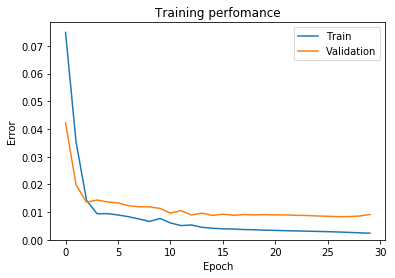

In [19]:
# To view the error plot of the train and validation set
plots.error_plot(lmnet)

(array([ 1.,  0.,  4.,  0., 11.,  0., 16.,  0., 25.,  0.,  0.,  7.,  0.,
         6.,  0.,  1.,  0.,  3.,  0.,  2.]),
 array([ 5.   ,  7.025,  9.05 , 11.075, 13.1  , 15.125, 17.15 , 19.175,
        21.2  , 23.225, 25.25 , 27.275, 29.3  , 31.325, 33.35 , 35.375,
        37.4  , 39.425, 41.45 , 43.475, 45.5  ], dtype=float32),
 <a list of 20 Patch objects>)

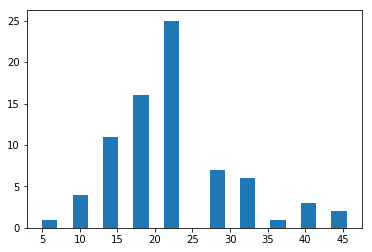

In [20]:
y_predict = lmnet.predict(x_test).round(1)
y_predict_re_scaled = target_scaler.inverse_transform(y_predict)

# To plot the histogram of predicted price value
plt.hist(y_predict_re_scaled, bins=20)

# From this histogram we can infer the distribution of the prices across different predicted prices

In [21]:
# To calculate the rmse of the predicted value with the original value
def rmse(expected, predicted):
    log_expected = np.log1p(expected + 1)
    log_predicted = np.log1p(predicted + 1)
    squared_log_error = np.square(log_expected - log_predicted)
    return np.sqrt(np.mean(squared_log_error))

error = rmse(
    target_scaler.inverse_transform(y_test), # To perform inverse transformation to identify the error
    target_scaler.inverse_transform(y_predict),
)

# To print the error rate of the predicted price value
print("The predicted error rate of the boston house pricing", error)

The predicted error rate of the boston house pricing 0.17967121775140937


In [ ]:
#EOF